In [23]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import keras

In [26]:
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train, x_test = x_train/255, x_test/255

In [7]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_train = x_train.reshape((60000, 28, 28, 1))    ## (width, height, number of channels)
x_test = x_test.reshape((10000, 28, 28, 1))

In [19]:
y_train = keras.utils.to_categorical(y_train)

## Before Preprocessing

In [17]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu',
                              input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1638912   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [20]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 14s 15ms/step - loss: 0.1112 - accuracy: 0.9651
Epoch 2/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0352 - accuracy: 0.9889
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0236 - accuracy: 0.9930
Epoch 4/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0179 - accuracy: 0.9946
Epoch 5/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0124 - accuracy: 0.9964


In [22]:
model.evaluate(x_test, keras.utils.to_categorical(y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.0282 - accuracy: 0.9918


[0.028216226026415825, 0.9918000102043152]

## After Preprocessing

In [24]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

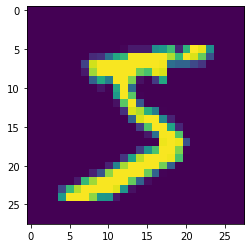

In [27]:
plt.imshow(x_train[0])

In [28]:
datagen.fit(x_train)

In [44]:
i = 0
X_train = []
_y_train = []
for x, y in datagen.flow(x_train, y_train, batch_size = 60000):
    if i == 1:
        break
    print(i)
    X_train.append(x)
    _y_train.append(y)
    i+=1
    

0


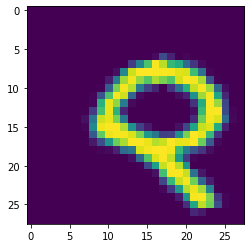

In [45]:
plt.imshow(X_train[0][0])

In [47]:
_y_train[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)